In [117]:
import pandas as pd

w1 = (pd.read_csv('MNweather1.csv')[['STATION', 'LATITUDE', 'LONGITUDE', 'DATE', 'PRCP',
       'SNOW', 'TAVG', 'TMAX', 'TMIN', 'TOBS']])
w2 = (pd.read_csv('MNweather2.csv')[['STATION', 'LATITUDE', 'LONGITUDE', 'DATE', 'PRCP',
       'SNOW', 'TAVG', 'TMAX', 'TMIN', 'TOBS']])
w3 = (pd.read_csv('MNweather3.csv')[['STATION', 'LATITUDE', 'LONGITUDE', 'DATE', 'PRCP',
       'SNOW', 'TAVG', 'TMAX', 'TMIN', 'TOBS']])
w4 = (pd.read_csv('MNweather4.csv')[['STATION', 'LATITUDE', 'LONGITUDE', 'DATE', 'PRCP',
       'SNOW', 'TAVG', 'TMAX', 'TMIN', 'TOBS']])
w5 = (pd.read_csv('MNweather5.csv')[['STATION', 'LATITUDE', 'LONGITUDE', 'DATE', 'PRCP',
       'SNOW', 'TAVG', 'TMAX', 'TMIN', 'TOBS']])
w6 = (pd.read_csv('MNweather6.csv')[['STATION', 'LATITUDE', 'LONGITUDE', 'DATE', 'PRCP',
       'SNOW', 'TAVG', 'TMAX', 'TMIN', 'TOBS']])

w = pd.concat([w1,w2,w3,w4,w5,w6],ignore_index=True)

w = w.drop(w[w['DATE'].str.contains('-02-29')].index)

In [118]:
w['day_of_year'] = (pd.to_datetime(w['DATE'])).dt.strftime('%m-%d')
#w = w.drop(w[w['TMAX'].isnull()].index)[['day_of_year','TMIN','TMAX']].set_index('day_of_year')

w

,STATION,LATITUDE,LONGITUDE,DATE,PRCP,SNOW,TAVG,TMAX,TMIN,TOBS,day_of_year
0,US1MNBU0008,44.150224,-94.021172,2014-06-17,1.48,NaN,NaN,NaN,NaN,NaN,06-17
1,US1MNBU0008,44.150224,-94.021172,2014-06-18,4.75,NaN,NaN,NaN,NaN,NaN,06-18
2,US1MNSB0004,44.687747,-94.038383,2014-01-01,0.00,0.0,NaN,NaN,NaN,NaN,01-01
3,US1MNSB0004,44.687747,-94.038383,2014-01-02,0.00,0.0,NaN,NaN,NaN,NaN,01-02
4,US1MNSB0004,44.687747,-94.038383,2014-01-03,0.00,0.0,NaN,NaN,NaN,NaN,01-03
...,...,...,...,...,...,...,...,...,...,...,...
630776,US1MNWG0033,44.838215,-92.935852,2017-12-27,0.00,0.0,NaN,NaN,NaN,NaN,12-27
630777,US1MNWG0033,44.838215,-92.935852,2017-12-28,0.03,0.3,NaN,NaN,NaN,NaN,12-28
630778,US1MNWG0033,44.838215,-92.935852,2017-12-29,0.05,0.7,NaN,NaN,NaN,NaN,12-29
630779,US1MNWG0033,44.838215,-92.935852,2017-12-30,0.03,0.3,NaN,NaN,NaN,NaN,12-30


In [119]:
df = pd.read_csv('speeding-clean.csv.txt')[['stop_date', 'datetime', 'violation_county']].set_index('datetime')

latlons = pd.read_csv('MNlatlons2.txt', sep='\t')
latlons['County'] = latlons['County'].str.upper().str.replace(' COUNTY','')
latlons['Lat'] = (latlons['NorthBd'] + latlons['SouthBd'])/2
latlons['Lon'] = (latlons['EastBd'] + latlons['WestBd'])/2
latlons.drop(columns = ['WestBd','EastBd','NorthBd','SouthBd'],inplace=True)

df = pd.merge(df,latlons, how='left', left_on='violation_county', right_on='County').drop(columns=['County'])


#df = df.drop(df[df['stop_date'].str.contains('02/29')].index)

df['day_of_year'] = pd.to_datetime(df['stop_date']).dt.strftime('%m-%d')

df = df.drop(df[df['day_of_year'] == '02-29'].index)

df

,stop_date,violation_county,Lat,Lon,day_of_year
0,01/01/14,HENNEPIN,45.015,-93.470,01-01
1,01/01/14,HENNEPIN,45.015,-93.470,01-01
2,01/01/14,HENNEPIN,45.015,-93.470,01-01
3,01/01/14,ST. LOUIS,47.500,-92.375,01-01
4,01/01/14,BLUE EARTH,44.055,-94.065,01-01
...,...,...,...,...,...
224910,06/18/17,RAMSEY,45.005,-93.105,06-18
224911,06/18/17,RAMSEY,45.005,-93.105,06-18
224912,06/18/17,ISANTI,45.575,-93.260,06-18
224913,06/18/17,WRIGHT,45.200,-93.885,06-18


In [120]:
#df['stop_date'] = pd.to_datetime(df['stop_date'])
#df['month'] = df['stop_date'].dt.month
#df['day'] = df['stop_date'].dt.day
#df = df.drop(df[(df['month'] == 2) & (df['day'] == 29)].index).drop(columns=['month','day'])
#df['day_of_year'] = df['stop_date'].dt.dayofyear

days_meanstops = df.groupby('day_of_year').count()

days_meanstops.loc[:170,'mean_count'] = days_meanstops['Lon'] / 4
days_meanstops.loc[170:,'mean_count'] = days_meanstops['Lon'] / 3
days_meanstops = days_meanstops['mean_count']

days_temps = w.drop(w[w['TMAX'].isnull()].index)[['day_of_year','TMIN','TMAX']]#.set_index('day_of_year')

#w.drop(w[~w['day_of_year'].str.contains('01-01')].index)

days_temps = days_temps[['day_of_year','TMIN']].groupby('day_of_year').agg('mean')
days_temps['TMAX'] = w[['day_of_year','TMAX']].groupby('day_of_year').agg('mean')

#days_temps

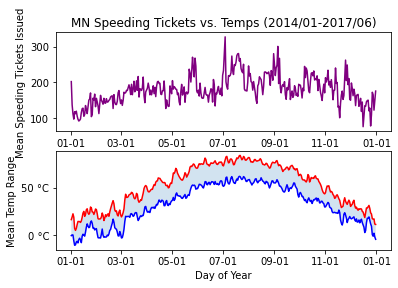

In [141]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import EngFormatter
from matplotlib.backends.backend_agg import FigureCanvasAgg

fig = plt.figure()
canvas = FigureCanvasAgg(fig)

predates = [s+'-2014' for s in days_meanstops.index.tolist()]
dates = pd.to_datetime(predates)
meanstops = days_meanstops.tolist()
maxtemps = days_temps['TMAX'].tolist()
mintemps = days_temps['TMIN'].tolist()

ax1 = plt.subplot(211)
plt.title('MN Speeding Tickets vs. Temps (2014/01-2017/06)')
plt.plot(dates,meanstops,color='purple')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Day of Year')
plt.ylabel('Mean Speeding Tickets Issued')

ax2 = plt.subplot(212)
plt.plot(dates,maxtemps,color='red')
plt.plot(dates,mintemps,color='blue')
plt.fill_between(dates,mintemps,maxtemps,alpha=0.2)
ax2.xaxis_date()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax2.yaxis.set_major_formatter(EngFormatter(unit=u"°C"))
plt.xlabel('Day of Year')
plt.ylabel('Mean Temp Range')

plt.show()

canvas.print_png('tickets_temps.png')

In [128]:
wpr = w[['day_of_year','DATE','PRCP','SNOW']].fillna(0.0)

days_prcp = wpr[['day_of_year','PRCP']].groupby('day_of_year').agg('mean')
days_prcp['SNOW'] = wpr[['day_of_year','SNOW']].groupby('day_of_year').agg('mean')

#wpr.drop(wpr[~wpr['day_of_year'].str.contains('01-01')].index)['SNOW'].tolist()

days_prcp

,PRCP,SNOW
day_of_year,,
01-01,0.006868,0.130287
01-02,0.015320,0.214306
01-03,0.037838,0.424425
01-04,0.028342,0.291923
01-05,0.001600,0.027071
...,...,...
12-27,0.039291,0.555280
12-28,0.015096,0.215499
12-29,0.049972,0.605866


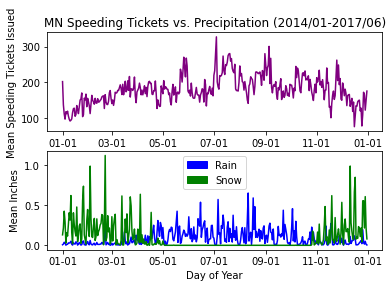

In [142]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import EngFormatter
import matplotlib.patches as mpatches
from matplotlib.backends.backend_agg import FigureCanvasAgg

fig = plt.figure()
canvas = FigureCanvasAgg(fig)

predates = [s+'-2014' for s in days_meanstops.index.tolist()]
dates = pd.to_datetime(predates)
meanstops = days_meanstops.tolist()
prcp = days_prcp['PRCP'].tolist()
snow = days_prcp['SNOW'].tolist()

ax1 = plt.subplot(211)
plt.title('MN Speeding Tickets vs. Precipitation (2014/01-2017/06)')
plt.plot(dates,meanstops,color='purple')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Day of Year')
plt.ylabel('Mean Speeding Tickets Issued')

ax2 = plt.subplot(212)
plt.plot(dates,prcp,color='blue')
plt.plot(dates,snow,color='green')
ax2.xaxis_date()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Day of Year')
plt.ylabel('Mean Inches')
blue_patch = mpatches.Patch(color='blue', label='Rain')
green_patch = mpatches.Patch(color='green', label='Snow')
plt.legend(handles=[blue_patch,green_patch])

plt.show()

canvas.print_png('tickets_prcp.png')